---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_fraud = pd.read_csv('data/fraud_data.csv')
df_fraud.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [3]:
def answer_one():
    # Your code here
    df = pd.read_csv('data/fraud_data.csv')
    
    return len(df[df['Class'] == 1]) / len(df) # Return your answer

answer_one()

0.016410823768035772

In [4]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/fraud_data.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

c:\Users\luisa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [5]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    # Your code here
    dummy_clf = DummyClassifier(strategy="most_frequent")
    dummy_clf.fit(X_train, y_train)
    y_pred = dummy_clf.predict(X_test)
    
    accuracy = dummy_clf.score(X_test, y_test)
    recall = recall_score(y_test, y_pred)
    
    return (accuracy, recall) # Return your answer

answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [6]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    # Your code here
    svc_clf = SVC().fit(X_train, y_train)
    y_pred = svc_clf.predict(X_test)

    accuracy = svc_clf.score(X_test, y_test)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return (accuracy, recall, precision) # Return your answer

answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [7]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    # Your code here
    svm = SVC(C=1e9, gamma=1e-07)
    svm.fit(X_train, y_train)

    y_pred = svm.decision_function(X_test) > -220

    return confusion_matrix(y_test, y_pred) # Return your answer

answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

<AxesSubplot:>

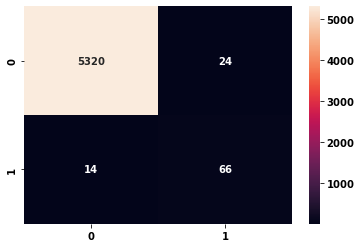

In [8]:
import seaborn as sns

sns.heatmap(answer_four(), annot=True, fmt='g')

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

(0.825, 0.9375)

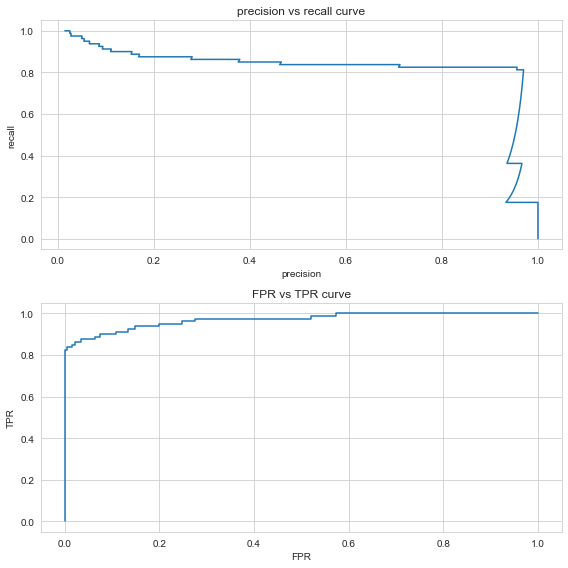

In [29]:
def answer_five():   
    # Your code here
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    import matplotlib.pyplot as plt
    import seaborn as sns
    # %matplotlib notebook

    sns.set_style("whitegrid")

    reg_clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
    y_proba = reg_clf.predict_proba(X_test)[:, -1]
    y_score = reg_clf.decision_function(X_test)

    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
    ax1.plot(precision, recall)
    ax1.set_title('precision vs recall curve')
    ax1.set_xlabel('precision')
    ax1.set_ylabel('recall')

    ax2.plot(fpr, tpr)
    ax2.set_title('FPR vs TPR curve')
    ax2.set_xlabel('FPR')
    ax2.set_ylabel('TPR')

    plt.tight_layout()

    return (recall[np.where(precision >= 0.75)[0][0]], tpr[np.where(fpr >= 0.16)[0][0]]) # Return your answer

answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [32]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    # Your code here
    parameters = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
    reg_clf = LogisticRegression(solver='liblinear')
    clf = GridSearchCV(reg_clf, parameters, scoring='recall')
    clf.fit(X_train, y_train)
    
    return clf.cv_results_['mean_test_score'].reshape(5, 2) # Return your answer

answer_six()
pd.DataFrame(answer_six(), columns=['l1', 'l2'], index=[0.01, 0.1, 1, 10, 100])

,l1,l2
0.01,0.695584,0.771688
0.10,0.807922,0.811558
1.00,0.804286,0.811494
10.00,0.800649,0.800649
100.00,0.800649,0.800649


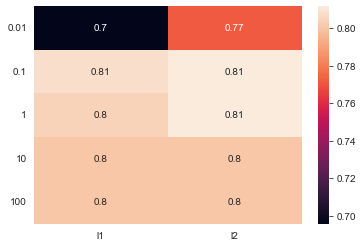

In [34]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    # %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100], annot=True)
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())